In [1]:
# https://github.com/ray-project/ray/blob/master/rllib/examples/sb2rllib_rllib_example.py
import ray
from ray import tune, air
import ray.rllib.algorithms.ppo as ppo
from IPython.display import display, clear_output
from time import sleep
from glob import glob
from pathlib import Path
from tqdm import tqdm
from itertools import count
import matplotlib.pyplot as plt

In [2]:
if ray.is_initialized():
    ray.shutdown()
ray.init(num_gpus=1, local_mode=False)

Usage stats collection is enabled by default for nightly wheels. To disable this, run the following command: `ray disable-usage-stats` before starting Ray. See https://docs.ray.io/en/master/cluster/usage-stats.html for more details.


2023-02-19 17:00:31,782	INFO worker.py:1536 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Python version:,3.8.15
Ray version:,3.0.0.dev0
Dashboard:,http://127.0.0.1:8265


In [3]:
# env config
import gymnasium as gym
import platoonenv

env_name = "Platoon-v6"
env_config=dict(
    num_vehicles=10,
    steps_before_truncation=200,
    cycle_interval=2,
    attack_interval=1,
    cycle_num=1,
)
env = gym.make(
    id=env_name,
    render_mode="canvas",
    env_config=env_config,
)

print(env_name,"\n------------------")
print("reward_threshold", env.spec.reward_threshold)
print("max_episode_steps", env.spec.max_episode_steps)

Platoon-v6 
------------------
reward_threshold None
max_episode_steps None


In [4]:
from ray.rllib.utils import check_env

check_env(env)

2023-02-19 17:00:35,491	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.


In [5]:
from ray.rllib.algorithms.ppo import PPOConfig
from ray.rllib.algorithms.dqn import DQNConfig
from ray.rllib.algorithms.random_agent import RandomAgentConfig

ppo_config = (
    PPOConfig()
    .environment(env=env_name, env_config=env_config)
    .framework("torch")
    .rollouts(num_rollout_workers=3)
    .resources(num_gpus=1, num_cpus_for_local_worker=0.5)
)

ppo_config.horizon = env.spec.max_episode_steps
ppo_config.create_env_on_local_worker=True

dqn_config = (
    DQNConfig()
    .environment(env=env_name, env_config=env_config)
    .framework("torch")
    .rollouts(num_rollout_workers=3)
    .resources(num_gpus=0.5, num_cpus_for_local_worker=0.5)
)
dqn_config.horizon = env.spec.max_episode_steps
dqn_config.create_env_on_local_worker=True

random_config = (
    RandomAgentConfig()
    .environment(env=env_name, env_config=env_config)
    .framework("torch")
    .rollouts(num_rollout_workers=3)
    .resources(num_gpus=0.5, num_cpus_for_local_worker=0.5)
)
random_config.horizon = env.spec.max_episode_steps
random_config.create_env_on_local_worker=True

In [6]:
ppo_algo = ppo_config.build()

(RolloutWorker pid=22612) 2023-02-19 17:00:44,901	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
(RolloutWorker pid=22612) 2023-02-19 17:00:44,934	INFO policy.py:1196 -- Policy (worker=1) running on CPU.
(RolloutWorker pid=22612) 2023-02-19 17:00:44,934	INFO torch_policy_v2.py:110 -- Found 1 visible cuda devices.
2023-02-19 17:00:45,058	INFO policy.py:1196 -- Policy (worker=local) running on 1 GPUs.
2023-02-19 17:00:45,059	INFO torch_policy_v2.py:110 -- Found 1 visible cuda devices.
(RolloutWorker pid=5908) 2023-02-19 17:00:45,008	INFO policy.py:1196 -- Policy (worker=3) running on CPU.
(RolloutWorker pid=5908) 2023-02-19 17:00:45,008	INFO torch_policy_v2.py:110 -- Found 1 visible cuda devices.
(RolloutWorker pid=19256) 2023-02-19 17:00:45,004	INFO policy.py:1196 -- Policy (worker=2) running on CP

In [7]:
!ray status

Traceback (most recent call last):
  File "C:\Users\TeamD\.conda\envs\rllib\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\TeamD\.conda\envs\rllib\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\TeamD\.conda\envs\rllib\Scripts\ray.exe\__main__.py", line 7, in <module>
  File "C:\Users\TeamD\.conda\envs\rllib\lib\site-packages\ray\scripts\scripts.py", line 2433, in main
    return cli()
  File "C:\Users\TeamD\.conda\envs\rllib\lib\site-packages\click\core.py", line 1130, in __call__
    return self.main(*args, **kwargs)
  File "C:\Users\TeamD\.conda\envs\rllib\lib\site-packages\click\core.py", line 1055, in main
    rv = self.invoke(ctx)
  File "C:\Users\TeamD\.conda\envs\rllib\lib\site-packages\click\core.py", line 1657, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "C:\Users\TeamD\.conda\envs\rllib\lib\site-packages\click\core.py", line 1404, in invoke
    

In [8]:
dqn_algo = dqn_config.build()

(RolloutWorker pid=20536) 2023-02-19 17:01:00,237	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
(RolloutWorker pid=20536) 2023-02-19 17:01:00,282	INFO policy.py:1196 -- Policy (worker=1) running on CPU.
(RolloutWorker pid=20536) 2023-02-19 17:01:00,282	INFO torch_policy.py:184 -- Found 1 visible cuda devices.
2023-02-19 17:01:00,479	INFO policy.py:1196 -- Policy (worker=local) running on 0.5 GPUs.
2023-02-19 17:01:00,480	INFO torch_policy.py:184 -- Found 1 visible cuda devices.
2023-02-19 17:01:00,504	INFO rollout_worker.py:2037 -- Built policy map: <PolicyMap lru-caching-capacity=100 policy-IDs=['default_policy']>
2023-02-19 17:01:00,505	INFO rollout_worker.py:2038 -- Built preprocessor map: {'default_policy': <ray.rllib.models.preprocessors.NoPreprocessor object at 0x000001810DB1C250>}
2023-02-

In [9]:
!ray status

(RolloutWorker pid=15448) 2023-02-19 17:01:00,447	INFO policy.py:1196 -- Policy (worker=3) running on CPU.
(RolloutWorker pid=15448) 2023-02-19 17:01:00,447	INFO torch_policy.py:184 -- Found 1 visible cuda devices.
(RolloutWorker pid=25440) 2023-02-19 17:01:00,447	INFO policy.py:1196 -- Policy (worker=2) running on CPU.
(RolloutWorker pid=25440) 2023-02-19 17:01:00,447	INFO torch_policy.py:184 -- Found 1 visible cuda devices.
Traceback (most recent call last):
  File "C:\Users\TeamD\.conda\envs\rllib\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\TeamD\.conda\envs\rllib\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\TeamD\.conda\envs\rllib\Scripts\ray.exe\__main__.py", line 7, in <module>
  File "C:\Users\TeamD\.conda\envs\rllib\lib\site-packages\ray\scripts\scripts.py", line 2433, in main
    return cli()
  File "C:\Users\TeamD\.conda\envs\rllib\lib\site-packages\click\core.py", line 11

In [10]:
random_algo = random_config.build()

In [11]:
!ray status

Traceback (most recent call last):
  File "C:\Users\TeamD\.conda\envs\rllib\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\TeamD\.conda\envs\rllib\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\TeamD\.conda\envs\rllib\Scripts\ray.exe\__main__.py", line 7, in <module>
  File "C:\Users\TeamD\.conda\envs\rllib\lib\site-packages\ray\scripts\scripts.py", line 2433, in main
    return cli()
  File "C:\Users\TeamD\.conda\envs\rllib\lib\site-packages\click\core.py", line 1130, in __call__
    return self.main(*args, **kwargs)
  File "C:\Users\TeamD\.conda\envs\rllib\lib\site-packages\click\core.py", line 1055, in main
    rv = self.invoke(ctx)
  File "C:\Users\TeamD\.conda\envs\rllib\lib\site-packages\click\core.py", line 1657, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "C:\Users\TeamD\.conda\envs\rllib\lib\site-packages\click\core.py", line 1404, in invoke
    

In [12]:
checkpoints = sorted(glob(str(Path("saved_models","**","checkpoint_*"))))

In [13]:
import ipywidgets as widgets

In [15]:
ppo_save_dir = Path("saved_models",f"{env_name}-{str(ppo_algo)}-{env_config['num_vehicles']}vehicles")
ppo_save_dir.mkdir(parents=True, exist_ok=True)
print(ppo_save_dir)

ppo_checkpoint_path = sorted(glob(str(ppo_save_dir / "*")))[-1] # grab latest

w = widgets.Dropdown(
    layout={'width': 'initial'},
    options=checkpoints,
    value=ppo_checkpoint_path,
    description='PPO:'
)

def on_change(change):
    global ppo_checkpoint_path
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])
        ppo_checkpoint_path = change['new']

w.observe(on_change)
display(w)

saved_models\Platoon-v6-PPO-10vehicles


Dropdown(description='PPO:', index=83, layout=Layout(width='initial'), options=('saved_models\\Platoon-v0-curi…

changed to saved_models\Platoon-v6-DQN-10vehicles-newreward\checkpoint_000597
changed to saved_models\Platoon-v6-PPO-10vehicles-newreward\checkpoint_000320


In [16]:
dqn_save_dir = Path("saved_models",f"{env_name}-{str(dqn_algo)}-{env_config['num_vehicles']}vehicles")
dqn_save_dir.mkdir(parents=True, exist_ok=True)
print(dqn_save_dir)

dqn_checkpoint_path = sorted(glob(str(dqn_save_dir / "*")))[-1] # grab latest

w = widgets.Dropdown(
    layout={'width': 'initial'},
    options=checkpoints,
    value=dqn_checkpoint_path,
    description='DQN:'
)

def on_change(change):
    global dqn_checkpoint_path
    if change['type'] == 'change' and change['name'] == 'value':
        print("changed to %s" % change['new'])
        dqn_checkpoint_path = change['new']

w.observe(on_change)
display(w)

saved_models\Platoon-v6-DQN-10vehicles


Dropdown(description='DQN:', index=71, layout=Layout(width='initial'), options=('saved_models\\Platoon-v0-curi…

changed to saved_models\Platoon-v6-PPO-10vehicles-newreward\checkpoint_000320
changed to saved_models\Platoon-v6-DQN-10vehicles-newreward\checkpoint_000597


In [18]:
print(f"PPO restoring from checkpoint: {ppo_checkpoint_path}")
ppo_algo.restore(ppo_checkpoint_path)

2023-02-19 17:04:59,734	INFO trainable.py:790 -- Restored on 127.0.0.1 from checkpoint: saved_models\Platoon-v6-PPO-10vehicles-newreward\checkpoint_000320
2023-02-19 17:04:59,734	INFO trainable.py:799 -- Current state after restoring: {'_iteration': 320, '_timesteps_total': None, '_time_total': 4039.070713043213, '_episodes_total': 6360}


PPO restoring from checkpoint: saved_models\Platoon-v6-PPO-10vehicles-newreward\checkpoint_000320


In [19]:
print(f"DQN restoring from checkpoint: {dqn_checkpoint_path}")
dqn_algo.restore(dqn_checkpoint_path)

2023-02-19 17:05:01,786	INFO trainable.py:790 -- Restored on 127.0.0.1 from checkpoint: saved_models\Platoon-v6-DQN-10vehicles-newreward\checkpoint_000597
2023-02-19 17:05:01,786	INFO trainable.py:799 -- Current state after restoring: {'_iteration': 597, '_timesteps_total': None, '_time_total': 4011.4212489128113, '_episodes_total': 2970}


DQN restoring from checkpoint: saved_models\Platoon-v6-DQN-10vehicles-newreward\checkpoint_000597


In [20]:
{
    "ppo":{k:v for k,v in ppo_algo.get_state().items() if k != "last_result"},
    "dqn": {k:v for k,v in dqn_algo.get_state().items() if k != "last_result"},
}

{'ppo': {'experiment_id': 'cb2de83cf64945bfb69e009c2dd340f0',
  'iteration': 320,
  'timesteps_total': None,
  'time_total': 4039.070713043213,
  'episodes_total': 6360,
  'ray_version': '3.0.0.dev0'},
 'dqn': {'experiment_id': '3662aae156ee4bef8c3477041f40b823',
  'iteration': 597,
  'timesteps_total': None,
  'time_total': 4011.4212489128113,
  'episodes_total': 2970,
  'ray_version': '3.0.0.dev0'}}

In [19]:
# iter = dqn_algo.get_state()["iteration"]
# assert dqn_algo.get_state()["iteration"] == ppo_algo.get_state()["iteration"]

In [21]:
import numpy as np

In [22]:
%matplotlib ipympl

In [23]:
env = gym.make(
    id=env_name,
    render_mode="canvas",
    env_config={
        **env_config,
        "steps_before_truncation": 200
    },
)

In [24]:
policies = {
    "ppo": lambda obs: ppo_algo.compute_single_action(obs, explore=True),
    "dqn": lambda obs: dqn_algo.compute_single_action(obs, explore=True),
    "random": lambda obs: env.action_space.sample(),
    "no-op": lambda obs: 0,
}

In [25]:
results = {}

In [26]:
num_episodes = 10
with tqdm(total=env_config["steps_before_truncation"]*len(policies)*num_episodes) as pbar:
    for policy_name, policy in policies.items():
        pbar.set_description(policy_name)
        actions = []
        rewards = []
        observations = []
        for episode in range(num_episodes):
            obs, info = env.reset(seed=episode)
            observations.append((obs,info))
            for episode_step in count():
                pbar.update()
                action = policy(obs=obs)
                next_obs, reward, terminated, truncated, info = env.step(action)
                actions.append(action)
                rewards.append(float(reward))
                observations.append((next_obs,info))
                if terminated or truncated:
                    # print(f"trained ended after step {episode_step} with reward {sum(rewards):.2f} (spec: {env.spec.reward_threshold})")
                    break
                obs = next_obs
        results[policy_name] = {
            "actions": actions,
            "rewards": rewards,
            "observations": observations,
        }


no-op: : 8040it [00:12, 640.59it/s]                          


In [27]:
# suffix = "iter" + dqn_algo.get_state()["iteration"]
suffix = "newreward"
figure_save_dir = Path("figures", f"{env_name}-{str(dqn_algo)}-{env_config['num_vehicles']}vehicles-{suffix}")
figure_save_dir.mkdir(parents=True, exist_ok=True)
print(figure_save_dir)

figures\Platoon-v6-DQN-10vehicles-newreward


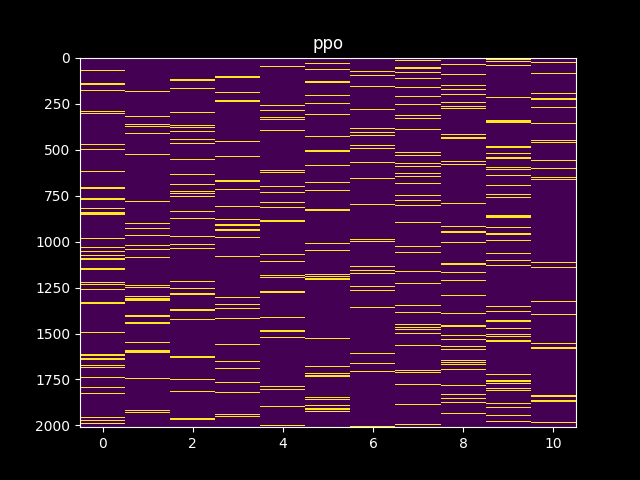

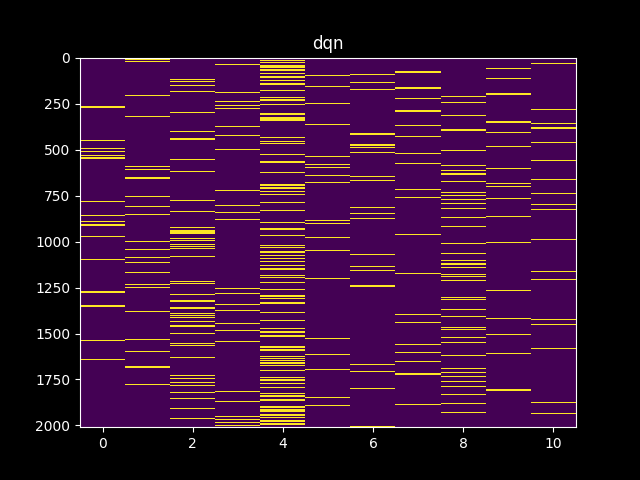

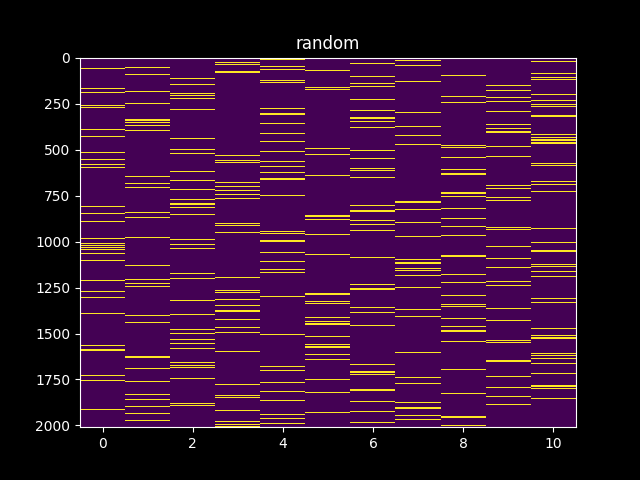

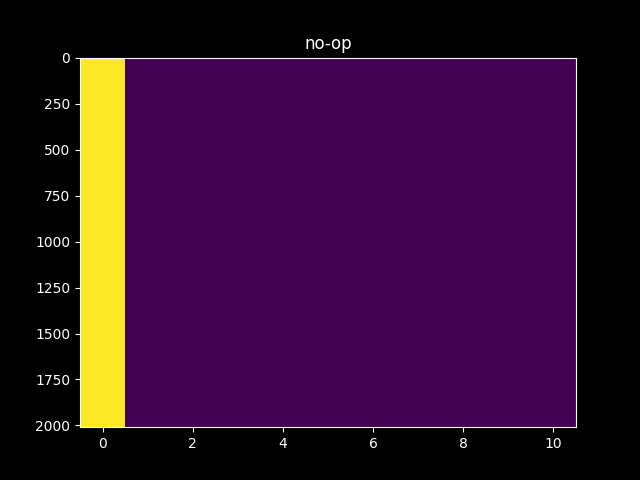

In [28]:
from keras.utils.np_utils import to_categorical
for policy_name, stats in results.items():
    plt.figure()
    plt.title(policy_name)
    plt.imshow(to_categorical(stats["actions"], num_classes=env.action_space.n), interpolation="nearest", aspect="auto")
    plt.show()
    plt.savefig(figure_save_dir / f"{policy_name}-actions.png", format="png")

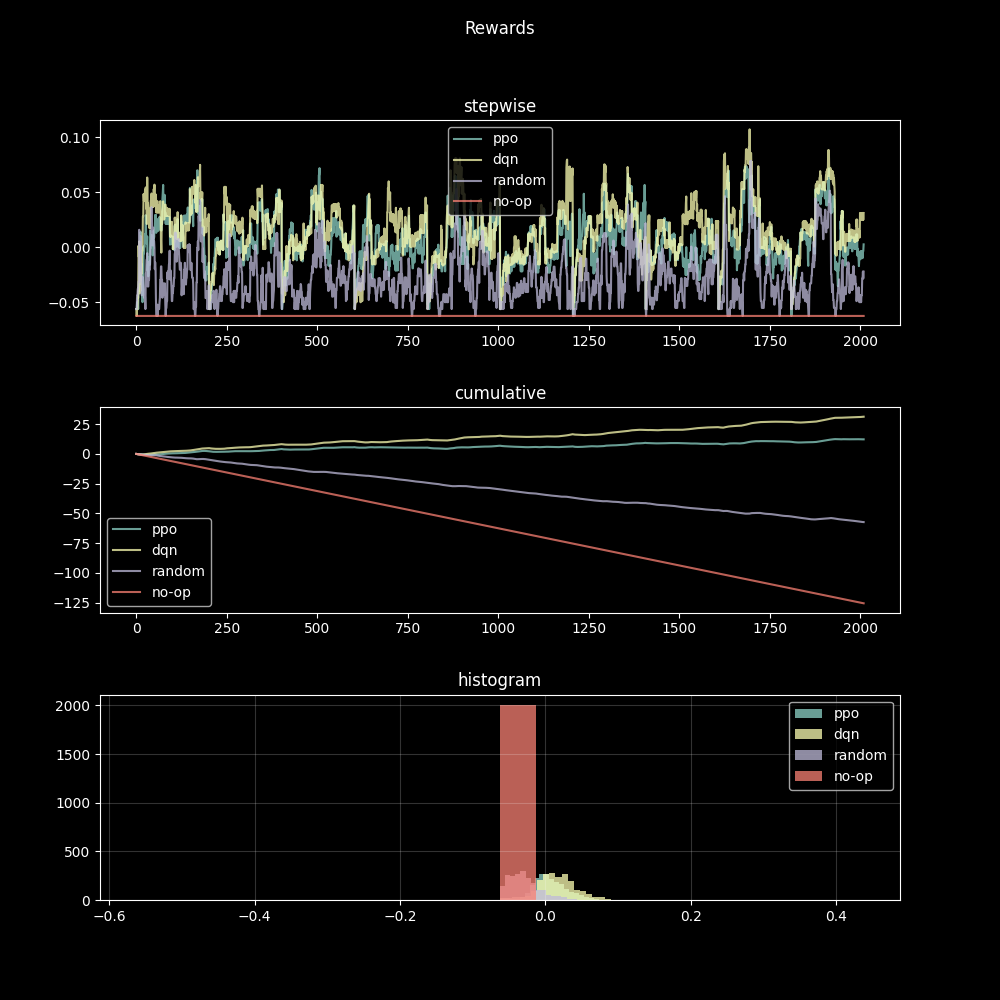

In [34]:
fig, axs = plt.subplots(nrows=3, figsize=(10, 10))
plt.subplots_adjust(
    left=0.1,
    bottom=0.1,
    right=0.9,
    top=0.88,
    # wspace=0.4,
    hspace=0.4,
)
fig.suptitle("Rewards")

axs[0].set_title("stepwise")
for policy_name, stats in results.items():
    axs[0].plot(stats["rewards"], label=policy_name, alpha=0.75)
axs[0].legend()


axs[1].set_title("cumulative")
for policy_name, stats in results.items():
    axs[1].plot(np.cumsum(stats["rewards"]), label=policy_name, alpha=0.75)
axs[1].legend()

axs[2].set_title("histogram")
for policy_name, stats in results.items():
    # if policy_name == "no-op": continue
    # if policy_name != "dqn": continue
    axs[2].hist(stats["rewards"], label=policy_name, alpha=0.75, bins=20)
axs[2].legend()

plt.grid(alpha=0.2)
plt.show()
plt.savefig(figure_save_dir / "rewards.png", format="png")

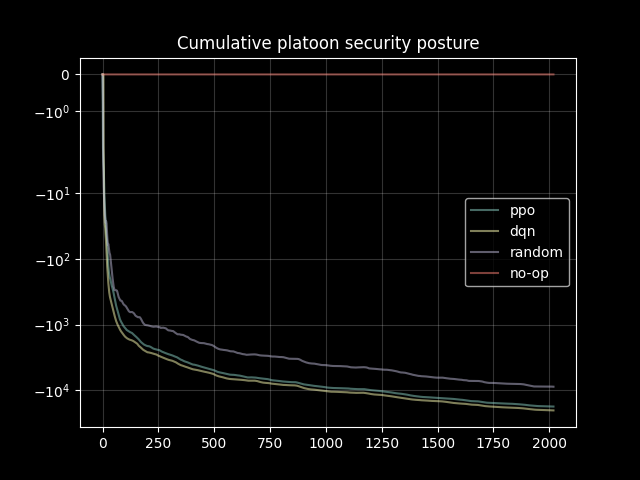

In [30]:
num_vehicles = env.num_vehicles
def measure(obs, info):
    # membership = obs[:num_vehicles]
    membership = info["state"][:,None]
    # values = obs[num_vehicles:num_vehicles*2]
    values = info["values"]
    # probs = obs[num_vehicles*2:num_vehicles*3]
    probs = info["probs"]

    return np.sum(membership * values * probs)
    
plt.figure()
plt.title("Cumulative platoon security posture")
for policy_name, stats in results.items():
    plt.plot(np.cumsum([measure(*x) for x in stats["observations"]]), label=policy_name, alpha=0.5)
plt.yscale("symlog")
plt.legend()
plt.grid(alpha=0.2)
plt.show()
plt.savefig(figure_save_dir / "cumulative-platoon-security.png", format="png")

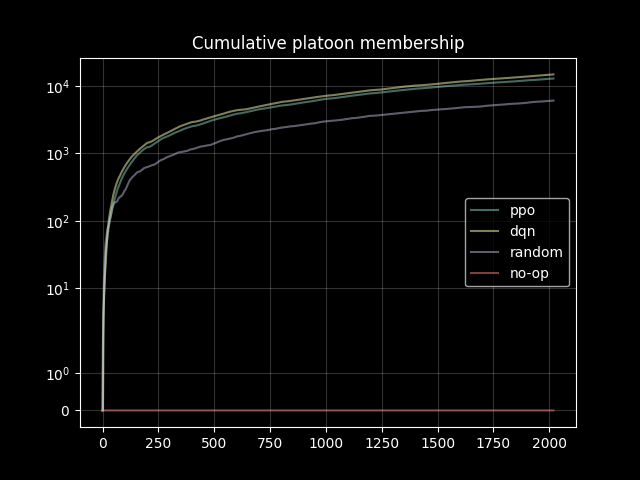

In [31]:
num_vehicles = env.num_vehicles
def measure(obs, info):
    membership = info["state"]
    
    return np.sum(membership)

plt.figure()
plt.title("Cumulative platoon membership")
for policy_name, stats in results.items():
    plt.plot(np.cumsum([measure(*x) for x in stats["observations"]]), label=policy_name, alpha=0.5)
plt.yscale("symlog")
plt.legend()
plt.grid(alpha=0.2)
plt.show()
plt.savefig(figure_save_dir / "cumulative-platoon-membership.png", format="png")

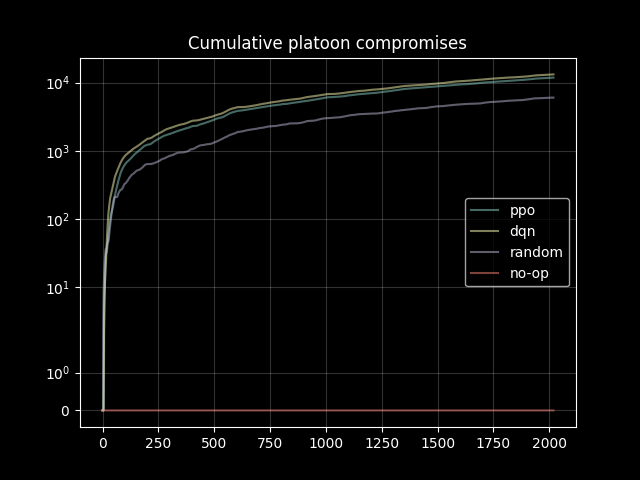

In [32]:
num_vehicles = env.num_vehicles
def measure(obs, info):
    # membership = obs[:num_vehicles]
    membership = info["state"][:,None]
    # values = obs[num_vehicles:num_vehicles*2]
    values = info["values"]
    # probs = obs[num_vehicles*2:num_vehicles*3]
    probs = info["probs"]

    return np.sum(membership * (probs == 1))

plt.figure()
plt.title("Cumulative platoon compromises")
for policy_name, stats in results.items():
    plt.plot(np.cumsum([measure(*x) for x in stats["observations"]]), label=policy_name, alpha=0.5)
plt.yscale("symlog")
plt.legend()
plt.grid(alpha=0.2)
plt.show()
plt.savefig(figure_save_dir / "cumulative-platoon-compromises.png", format="png")

In [33]:
totals = [sum(stats["rewards"]) for stats in results.values()]
best = max(totals)
for (policy_name, stats), total in zip(results.items(), totals):
    steps = env_config["steps_before_truncation"]
    pct = (best-total)/best*100
    print(f"{policy_name}: {total:.2f} ({pct:.2f}%)")

ppo: 12.21 (60.93%)
dqn: 31.25 (0.00%)
random: -57.36 (283.56%)
no-op: -125.62 (502.04%)
